<a href="https://colab.research.google.com/github/sunshineluyao/vis-basics/blob/main/AI4Humanity/CTL_CBL_Nov20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teaching and Learning with the Local Community: Visualizations


In [1]:
from nltk.data import clear_cache
clear_cache()


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  # Include the suggested additional package if still an issue


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## 1. Word Cloud of Key Themes
This word cloud visualizes the most frequently occurring words in the event summary, providing an overview of the core themes discussed.



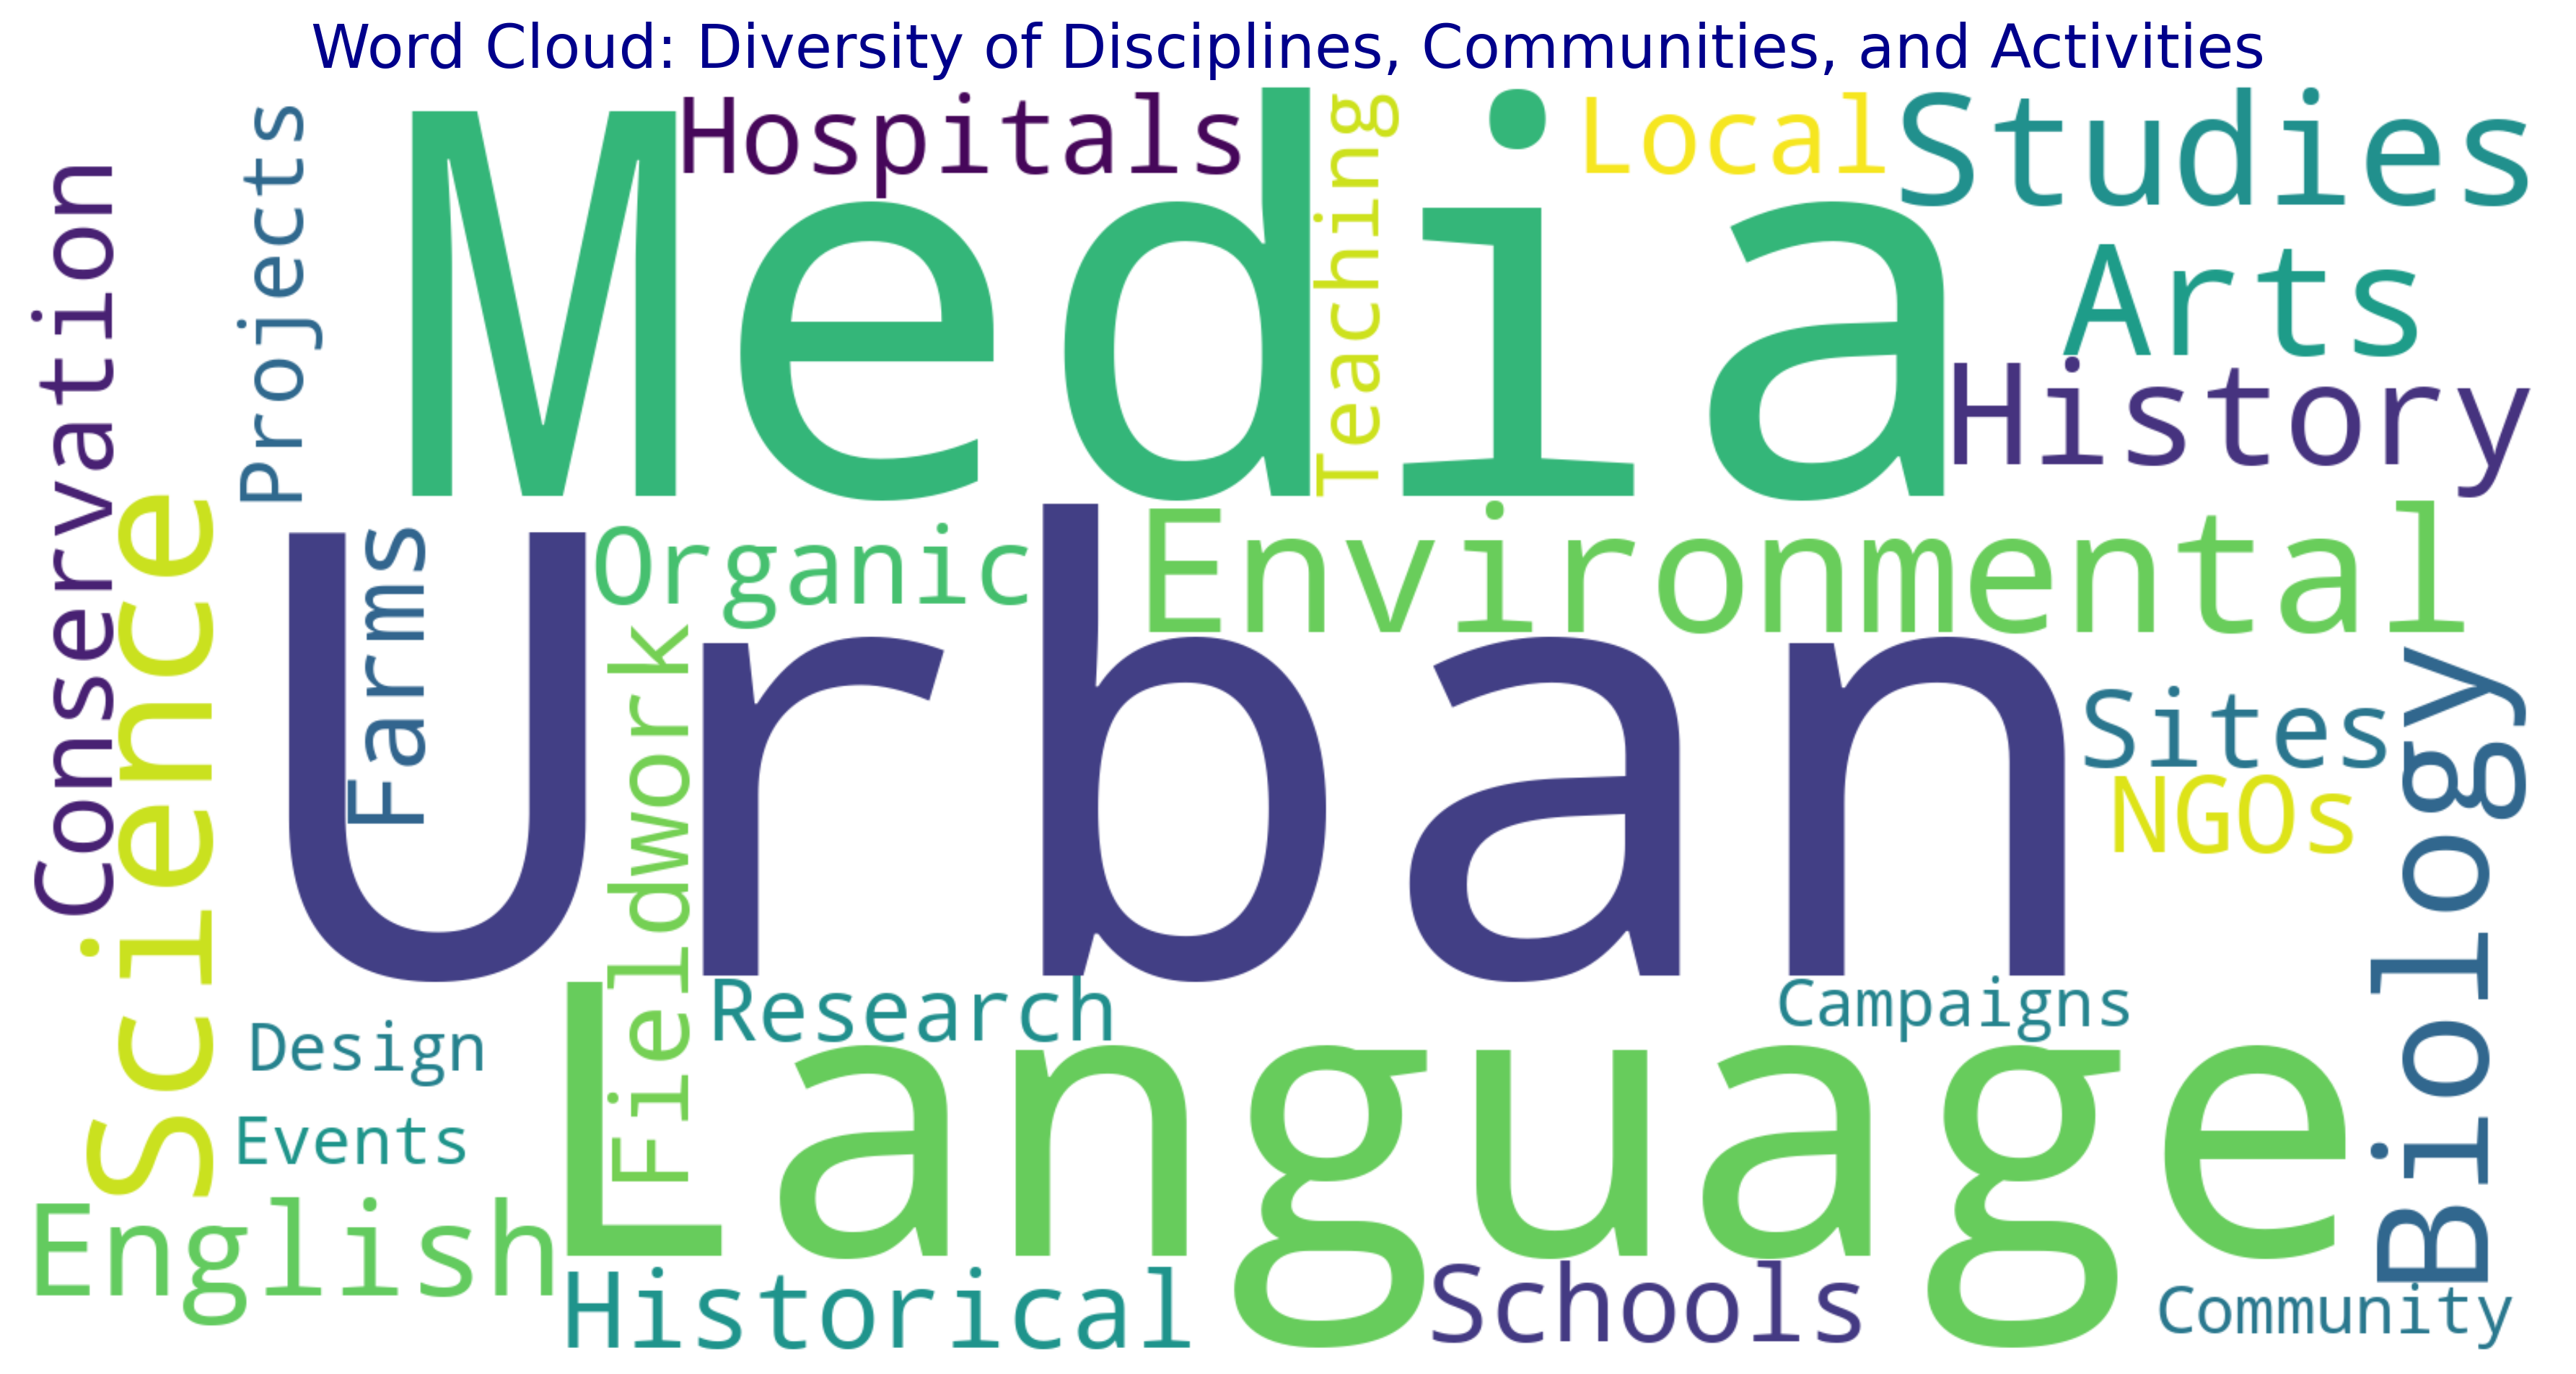

In [3]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine text from the relevant sections
diversity_text = """
Environmental Science Urban Studies Media Arts Biology History English Language
Hospitals Historical Sites Conservation NGOs Organic Farms Local Schools
Fieldwork Research Projects Language Teaching Media Campaigns Urban Design Community Events
"""

wordcloud = WordCloud(width=1600, height=800, background_color='white', colormap='viridis', max_words=100).generate(diversity_text)

plt.figure(figsize=(12, 8), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Diversity of Disciplines, Communities, and Activities', fontsize=20, color='darkblue')
plt.tight_layout()
plt.savefig('word_cloud_diversity.png', dpi=300)
plt.show()


In [4]:
!pip install plotly

import plotly.express as px
px.imshow(wordcloud.to_array(), title='Interactive Word Cloud: Diversity of Disciplines')


## 2. Challenges in CBL Implementation


In [14]:
!pip install plotly
import pandas as pd

import plotly.express as px

# Define hierarchical data for challenges and strategies
data = {
    "Challenge": [
        "Logistical Issues", "Logistical Issues", "Logistical Issues",
        "Trust Building", "Trust Building", "Trust Building",
        "Workload Management", "Workload Management", "Workload Management"
    ],
    "Strategy": [
        "Improve Scheduling", "Optimize Resources", "Flexible Deadlines",
        "Transparent Communication", "Frequent Follow-ups", "Deliver on Promises",
        "Task Delegation", "Time Management Training", "Reduce Overload"
    ],
    "Weight": [15, 15, 10, 10, 10, 10, 15, 10, 5]  # Hypothetical strategy weights
}

df = pd.DataFrame(data)

# Create Sunburst Chart
fig = px.sunburst(
    df,
    path=['Challenge', 'Strategy'],  # Define hierarchy
    values='Weight',                 # Size of slices
    color='Challenge',               # Color by main challenge
    color_discrete_map={
        'Logistical Issues': '#ff9999',
        'Trust Building': '#66b3ff',
        'Workload Management': '#99ff99'
    },
    title='Challenges and Future Strategies for CBL Implementation'
)

fig.update_layout(
    title_font_size=20,
    margin=dict(t=50, l=10, r=10, b=10)
)

fig.show()


In [6]:
pip install -U kaleido

In [15]:
import plotly.io as pio
pio.write_image(fig, 'sunburst_challenges_strategies.png', scale=3)


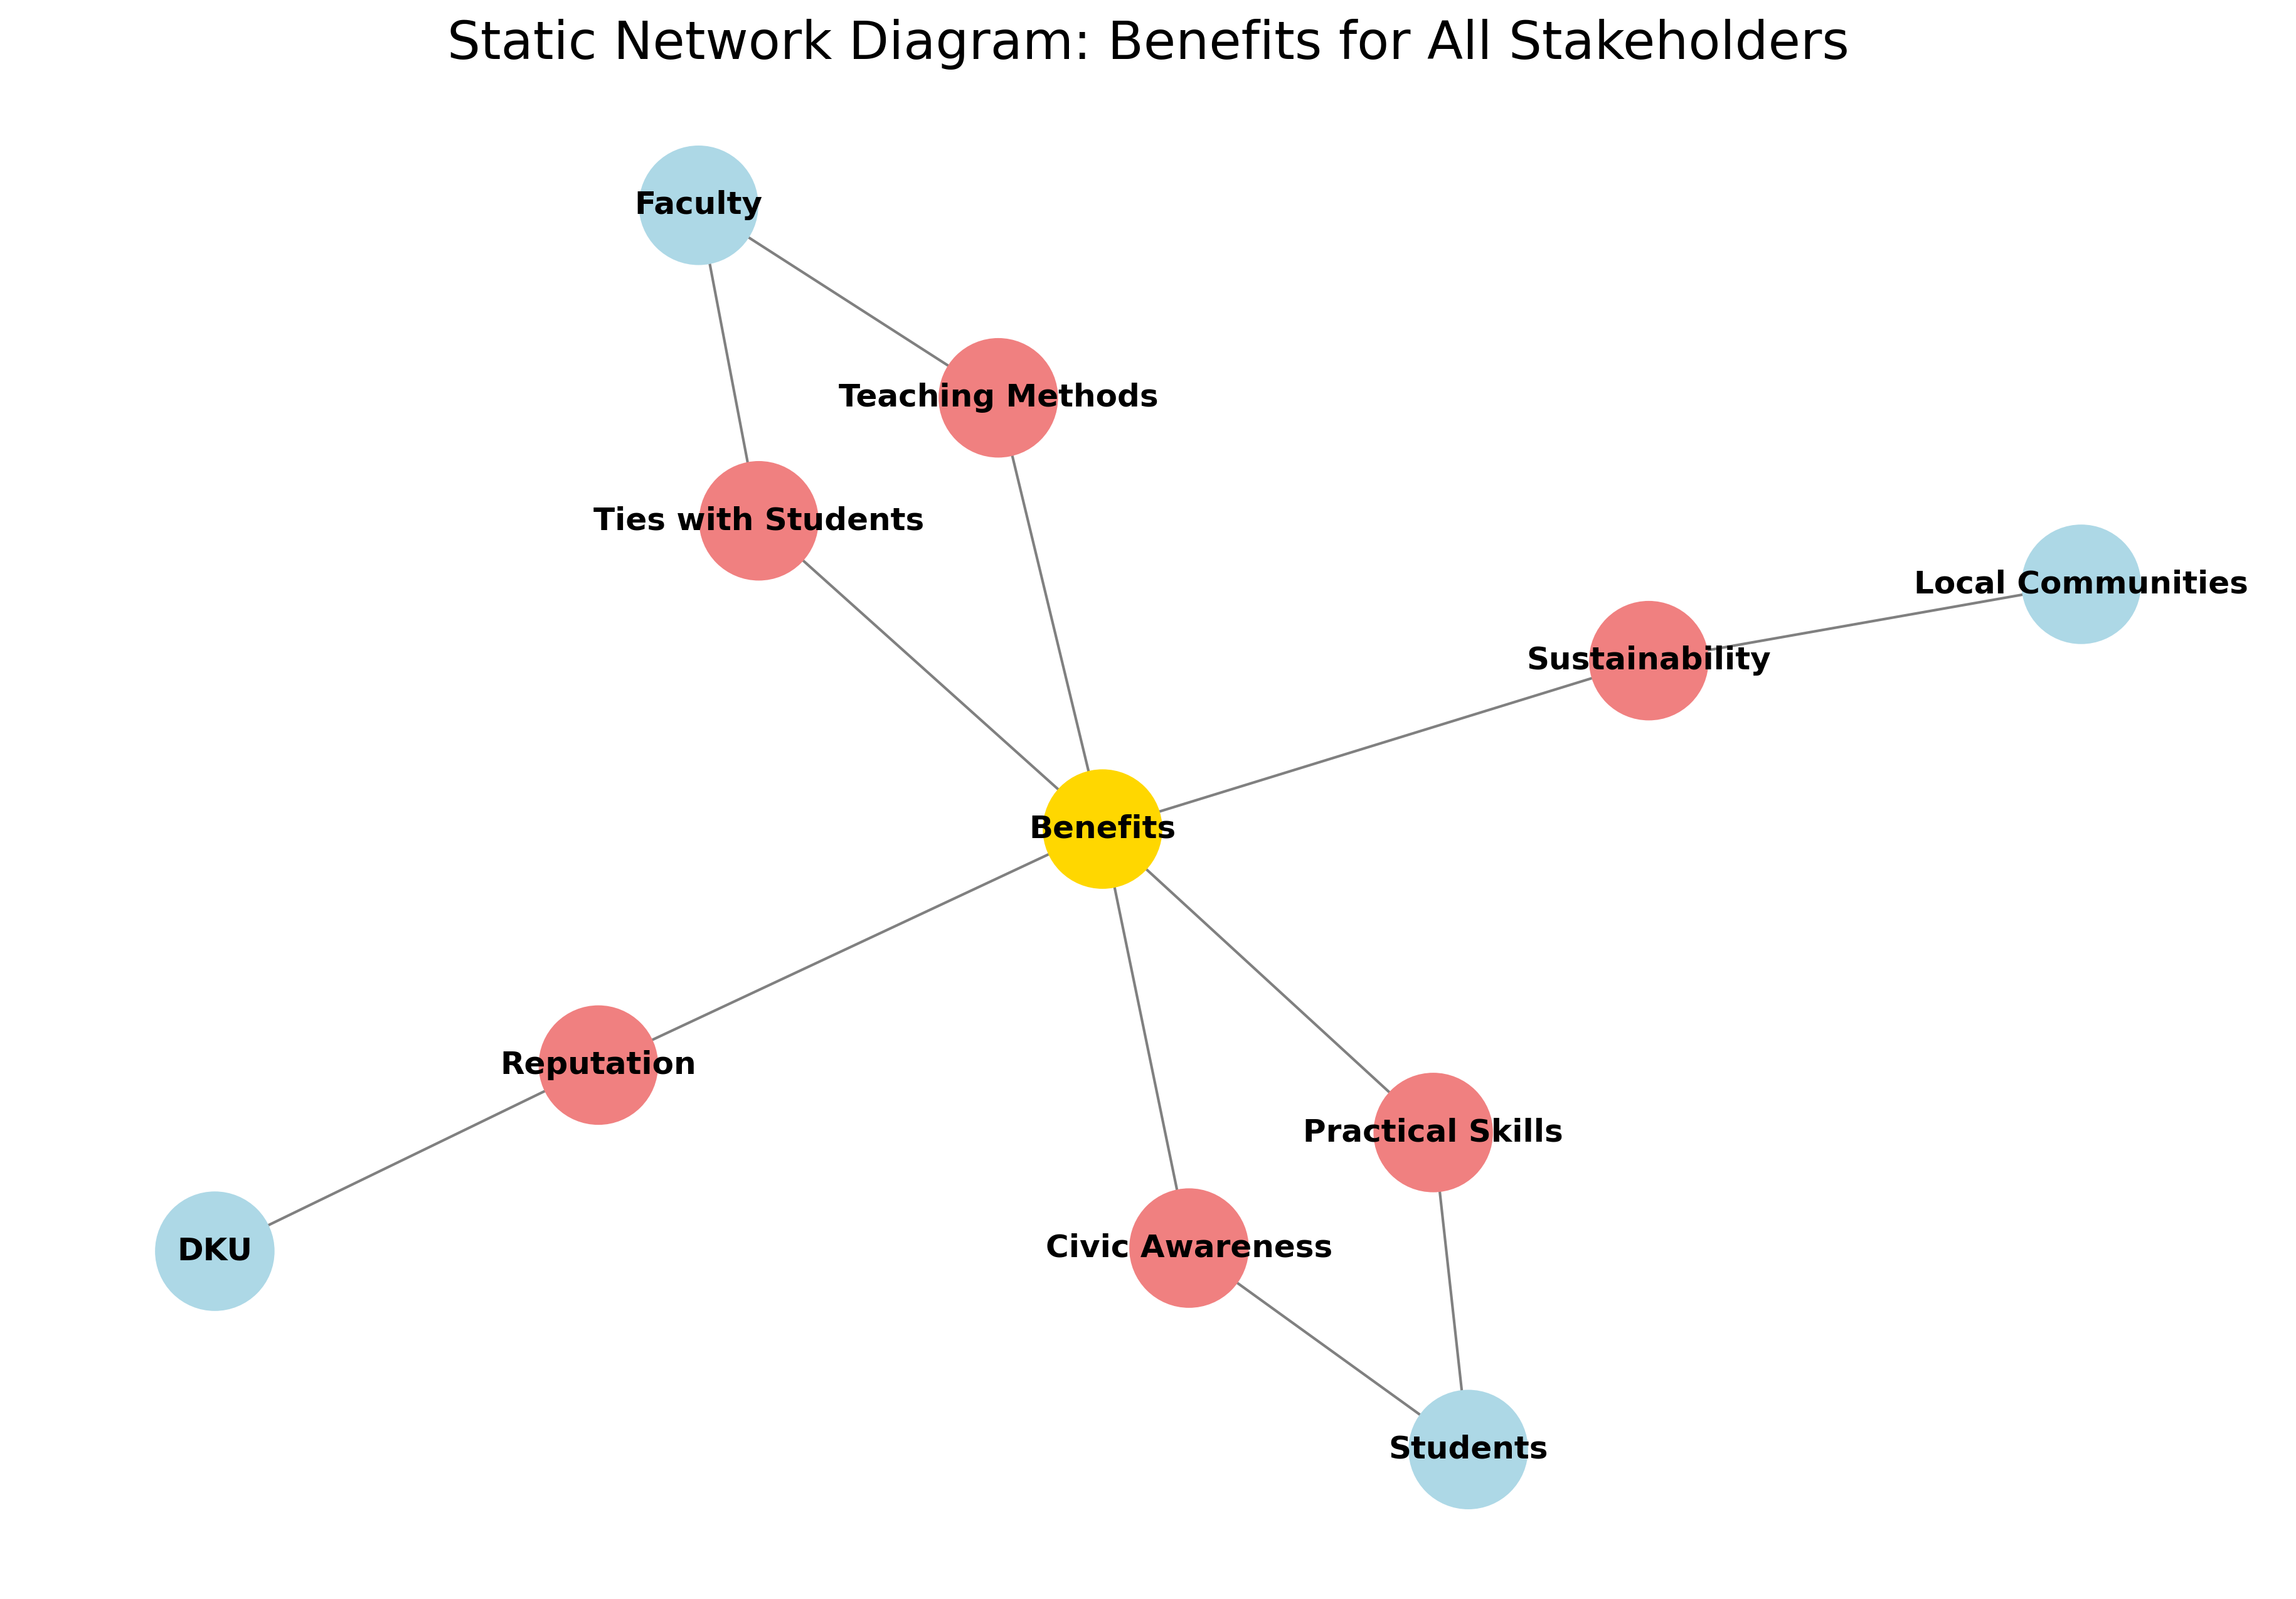

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Define relationships
G = nx.Graph()
central_node = 'Benefits'
stakeholders = ['Students', 'Faculty', 'Local Communities', 'DKU']
benefit_nodes = ['Practical Skills', 'Civic Awareness', 'Teaching Methods', 'Sustainability', 'Reputation', 'Ties with Students']

# Add the central node
G.add_node(central_node)

# Connect benefits to central node
G.add_edges_from([(central_node, benefit) for benefit in benefit_nodes])

# Connect stakeholders to their specific benefits
G.add_edges_from([
    ('Students', 'Practical Skills'),
    ('Students', 'Civic Awareness'),
    ('Faculty', 'Teaching Methods'),
    ('Faculty', 'Ties with Students'),
    ('Local Communities', 'Sustainability'),
    ('DKU', 'Reputation')
])

# Define positions with central node fixed in the middle
pos = nx.spring_layout(G, seed=42, center=(0, 0), k=0.5)

# Color coding for nodes
node_colors = []
for node in G.nodes():
    if node == central_node:
        node_colors.append('gold')  # Central node color
    elif node in benefit_nodes:
        node_colors.append('lightcoral')  # Benefit nodes color
    else:
        node_colors.append('lightblue')  # Stakeholders color

plt.figure(figsize=(12, 8), dpi=300)
nx.draw(
    G, pos, with_labels=True,
    node_size=2000,
    node_color=node_colors,
    font_size=12,
    font_color='black',
    font_weight='bold',
    edge_color='gray'
)
plt.title('Static Network Diagram: Benefits for All Stakeholders', fontsize=20)
plt.savefig('revised_network_benefits.png', dpi=300)
plt.show()
